In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [20]:
header_row = ['word','frequency']
data = pd.read_table('../Data/CountWordsNovels.txt', sep =' ',names=header_row)
# Add plus 1 to the rank since index starts from 0
data['rank'] = data.index + 1
data.head()

,word,frequency,rank
0,i,37789,1
1,he,27976,2
2,his,27824,3
3,had,20869,4
4,you,17540,5


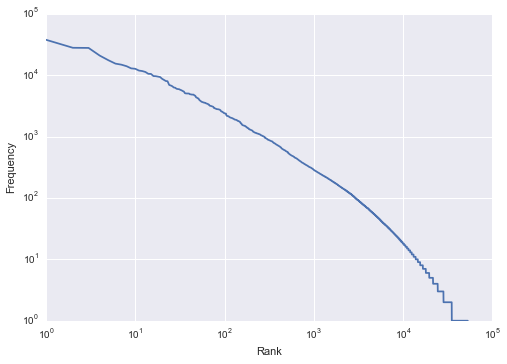

In [19]:
plt.plot((data['rank']),data['frequency'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()